# Activation Functions in PyTorch

Data used for this notebook is from a Kaggle competition  
Link to the competition: https://www.kaggle.com/c/santander-customer-transaction-prediction  
Type of Problem: Classification  
  
  
Pytorch Activations: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

## Import libraries

In [1]:
import torch
from torch import nn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

## Get training data

In [2]:
df_train = pd.read_csv('data/train.csv')

print(df_train.shape)
df_train.head(2)

(200000, 202)


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [3]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## Pre-processing data

In [4]:
var_columns = [c for c in df_train.columns if c not in ('ID_code','target')]
len(var_columns)

200

In [5]:
scaler = MinMaxScaler()

df_train[var_columns] = scaler.fit_transform(df_train[var_columns])
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,0.515985,0.527761,0.498848,0.516818,0.517698,0.551997,0.501877,0.501123,0.522330,...,0.532601,0.521950,0.470032,0.502746,0.483477,0.536917,0.507605,0.488022,0.483899,0.527460
std,0.300653,0.152716,0.159324,0.153221,0.154463,0.139968,0.157852,0.142057,0.152988,0.161333,...,0.140158,0.155773,0.121015,0.132779,0.162998,0.149925,0.167666,0.152592,0.152223,0.154974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.404160,0.405322,0.383234,0.400217,0.414637,0.428839,0.396761,0.384659,0.396368,...,0.431376,0.404422,0.385063,0.411373,0.360573,0.429027,0.376952,0.379516,0.380712,0.410436
50%,0.000000,0.508191,0.528530,0.491004,0.518970,0.520277,0.556658,0.497967,0.497138,0.527633,...,0.531653,0.517279,0.467860,0.504894,0.481614,0.533706,0.510850,0.484718,0.487100,0.534987
75%,0.000000,0.620387,0.645236,0.603369,0.632294,0.619692,0.672246,0.599256,0.615573,0.650798,...,0.630091,0.628818,0.553659,0.598340,0.608396,0.638836,0.638353,0.601460,0.594820,0.648661
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Split training data into dependent and independent variables

In [6]:
X_np = df_train.loc[:, var_columns].to_numpy()
y_np = df_train.loc[:, 'target'].to_numpy()

In [7]:
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32).reshape(-1,1)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

(torch.Size([160000, 200]),
 torch.Size([40000, 200]),
 torch.Size([160000, 1]),
 torch.Size([40000, 1]))

## 1. Sigmoid
$$ Sigmoid(x)=\frac{1}{1+e^{-x}} $$

**Pros**:
- Sigmoid outputs values between 0 and 1, which is useful for binary classification where the goal is to produce probabilities
- Well-suited for the output layer of binary classification models  

**Cons:**
- Suffers from the vanishing gradient problem, making it less effective in deep networks
- Outputs are not zero-centered, which can slow down learning in some cases  

[Pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid)


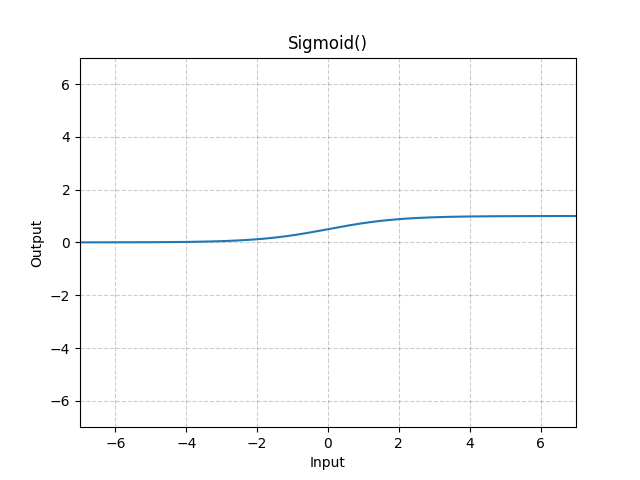

In [9]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.Sigmoid(),
    nn.Linear(80, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

#### Training on entire data for multiple epochs

In [10]:
def train_model(model, X_train, y_train, X_val, y_val):
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

    n_epochs = 10
    batch_size = 1000
    
    loss_train_list=[]
    loss_val_list=[]

    for epoch in range(n_epochs):
        for b in range(0, X_train.shape[0], batch_size):
            # Start training
            model.train()

            # Get data in batches
            X_train_batch = X_train[b:b+batch_size]
            y_train_batch = y_train[b:b+batch_size]

            # Make predictions
            y_train_batch_pred = model(X_train_batch)
            
            # Calculate loss
            loss_train = loss_fn(y_train_batch_pred, y_train_batch)
            
            # Backpropagation
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            
        # Evaluation on validation data
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            loss_val = loss_fn(y_val_pred, y_val)
            print(f'Epoch {epoch}, training loss {loss_train}, validation loss {loss_val}')
    
    return model

In [11]:
model = train_model(model, X_train, y_train, X_val, y_val)

Epoch 0, training loss 0.27063751220703125, validation loss 0.3303389549255371
Epoch 1, training loss 0.2706187069416046, validation loss 0.3303269147872925
Epoch 2, training loss 0.270607054233551, validation loss 0.3303143084049225
Epoch 3, training loss 0.2705952823162079, validation loss 0.33030152320861816
Epoch 4, training loss 0.27058330178260803, validation loss 0.3302885890007019
Epoch 5, training loss 0.27057114243507385, validation loss 0.33027535676956177
Epoch 6, training loss 0.27055883407592773, validation loss 0.3302619755268097
Epoch 7, training loss 0.27054622769355774, validation loss 0.33024826645851135
Epoch 8, training loss 0.27053338289260864, validation loss 0.33023425936698914
Epoch 9, training loss 0.27052032947540283, validation loss 0.33021995425224304


#### Calculate ROC AUC

In [12]:
def validation_auc(model, X_val, y_val):
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val)

    fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred.detach().numpy())
    roc_auc = auc(fpr, tpr)
    return roc_auc

roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")


ROC AUC: 0.6474287929458942


## 2. Tanh

$$ tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} $$

**Pros:**
- Similar to the sigmoid but zero-centered, which helps mitigate the vanishing gradient problem to some extent
- Outputs in the range of -1 to 1, providing better symmetry  

**Cons:**
- Still prone to the vanishing gradient problem, especially in deep networks
- Can saturate and kill gradients if not used carefully  

[pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh)  

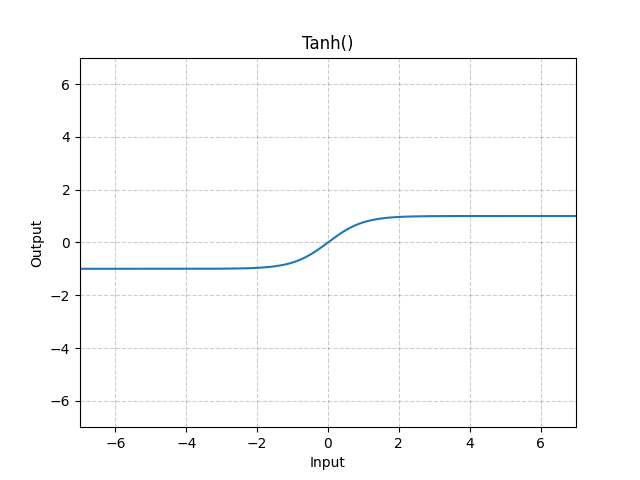

In [13]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.Tanh(),
    nn.Linear(80, 10),
    nn.Tanh(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

# Calculate ROC curve and AUC
roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 0, training loss 0.27011576294898987, validation loss 0.3300158977508545
Epoch 1, training loss 0.26969215273857117, validation loss 0.32949453592300415
Epoch 2, training loss 0.26898205280303955, validation loss 0.3286144435405731
Epoch 3, training loss 0.2674465775489807, validation loss 0.3267655670642853
Epoch 4, training loss 0.26303353905677795, validation loss 0.32234999537467957
Epoch 5, training loss 0.24925050139427185, validation loss 0.31175103783607483
Epoch 6, training loss 0.22722788155078888, validation loss 0.299299031496048
Epoch 7, training loss 0.21379655599594116, validation loss 0.26720431447029114
Epoch 8, training loss 0.21119709312915802, validation loss 0.2896594703197479
Epoch 9, training loss 0.26331016421318054, validation loss 0.2718017101287842

ROC AUC: 0.8558738675849747


## 3. ReLU (Rectified linear unit)

$$ ReLU(x)=max(0,x) $$

**Pros:**
- Simple and computationally efficient
- Mitigates the vanishing gradient problem
- Allows the model to learn quickly and often leads to sparser representations  

**Cons:**
- Prone to the "dying ReLU" problem, where neurons can become inactive during training
- Not zero-centered, which may lead to convergence issues in some cases  

[pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)  

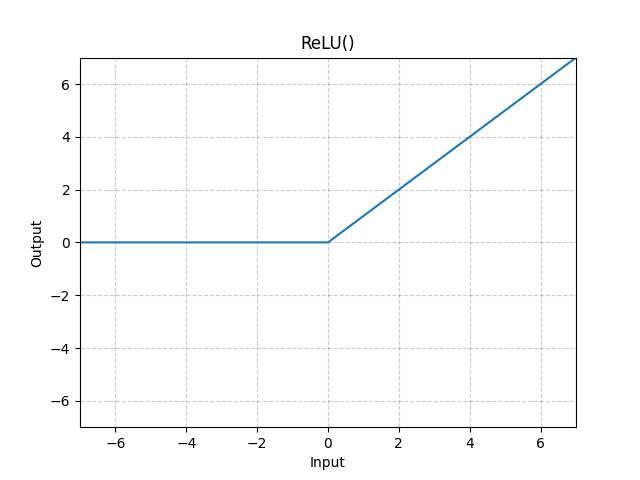

In [14]:
# Model Architecture
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ReLU(),
    nn.Linear(80, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

# Train Model
model = train_model(model, X_train, y_train, X_val, y_val)

# Calculate ROC curve and AUC
roc_auc = validation_auc(model, X_val, y_val)
print(f"\nROC AUC: {roc_auc}")

Epoch 0, training loss 0.26923108100891113, validation loss 0.3290834426879883
Epoch 1, training loss 0.26727691292762756, validation loss 0.3270679712295532
Epoch 2, training loss 0.26425665616989136, validation loss 0.3239850699901581
Epoch 3, training loss 0.2580423355102539, validation loss 0.3181505501270294
Epoch 4, training loss 0.2434137910604477, validation loss 0.30582737922668457
Epoch 5, training loss 0.22910064458847046, validation loss 0.30134713649749756
Epoch 6, training loss 0.21709564328193665, validation loss 0.2647155523300171
Epoch 7, training loss 0.2129165381193161, validation loss 0.28805190324783325
Epoch 8, training loss 0.20790037512779236, validation loss 0.27901795506477356
Epoch 9, training loss 0.20528094470500946, validation loss 0.2799738645553589

ROC AUC: 0.857159047405081


## 4. Leaky ReLU

$$
\begin{equation}
    LeakyReLU(x) = 
    \begin{cases}
      x, & \text{if}\ x>0 \\
      NegativeSlope\times  x, & \text{otherwise}
    \end{cases}
\end{equation}
$$

_Negative slope is supposed to be small_

**Pros:**
- Addresses the "dying ReLU" problem by allowing a small gradient for negative inputs
- Maintains the advantages of ReLU while reducing the risk of dead neurons  

**Cons:**
- May not perform well on all types of data  


[pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU) 

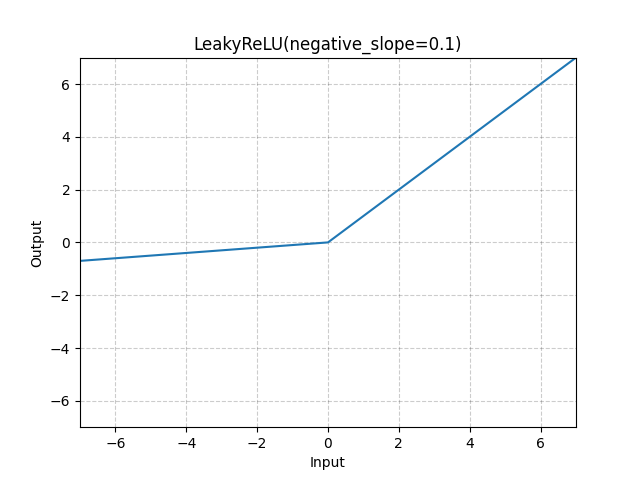

In [15]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.LeakyReLU(),
    nn.Linear(80, 10),
    nn.LeakyReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

# Calculate ROC curve and AUC
roc_auc = validation_auc(model, X_val, y_val)
print(f"ROC AUC: {roc_auc}")

Epoch 0, training loss 0.2695828974246979, validation loss 0.32956162095069885
Epoch 1, training loss 0.2673824429512024, validation loss 0.32730957865715027
Epoch 2, training loss 0.26412275433540344, validation loss 0.32406243681907654
Epoch 3, training loss 0.2578141391277313, validation loss 0.3182884752750397
Epoch 4, training loss 0.24350698292255402, validation loss 0.30623599886894226
Epoch 5, training loss 0.23083709180355072, validation loss 0.30490347743034363
Epoch 6, training loss 0.2225760966539383, validation loss 0.26548531651496887
Epoch 7, training loss 0.2193349152803421, validation loss 0.2559456527233124
Epoch 8, training loss 0.1960984170436859, validation loss 0.25444790720939636
Epoch 9, training loss 0.19334430992603302, validation loss 0.2548429071903229
ROC AUC: 0.8574175307370753


## 5.Parametric ReLU (PReLU)

$$
\begin{equation}
    PReLU(x) = 
    \begin{cases}
      x, & \text{if}\ x>0 \\
      \alpha x, & \text{otherwise}
    \end{cases}
\end{equation}
$$

**Pros:**
- Similar to Leaky ReLU but with the advantage of learning the slope during training
- Can adaptively determine the best slope for each neuron  

**Cons:**
- Introduces more parameters, potentially leading to overfitting on small datasets
- Requires more computational resources  

[pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.PReLU.html#torch.nn.PReLU)

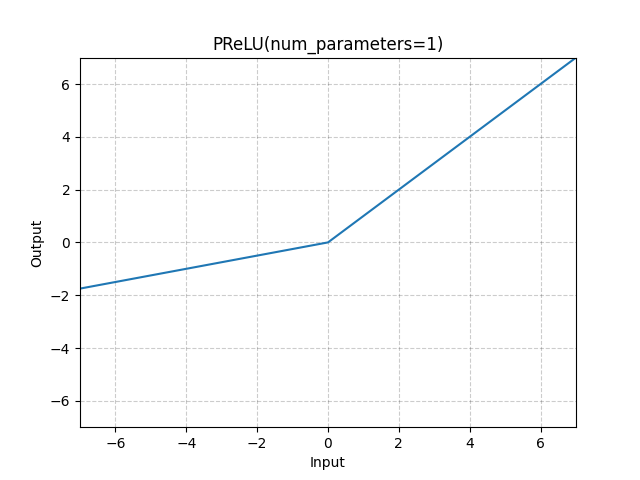

In [16]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.PReLU(),
    nn.Linear(80, 10),
    nn.PReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

# Calculate ROC curve and AUC
roc_auc = validation_auc(model, X_val, y_val)
print(f"ROC AUC: {roc_auc}")

Epoch 0, training loss 0.27054235339164734, validation loss 0.32986778020858765
Epoch 1, training loss 0.2694321274757385, validation loss 0.3286301791667938
Epoch 2, training loss 0.2679153382778168, validation loss 0.32693713903427124
Epoch 3, training loss 0.2655819356441498, validation loss 0.32425791025161743
Epoch 4, training loss 0.2607741951942444, validation loss 0.31915906071662903
Epoch 5, training loss 0.24858413636684418, validation loss 0.30852553248405457
Epoch 6, training loss 0.23176299035549164, validation loss 0.2976672649383545
Epoch 7, training loss 0.22489814460277557, validation loss 0.3033677935600281
Epoch 8, training loss 0.2173014134168625, validation loss 0.2949333190917969
Epoch 9, training loss 0.2107582986354828, validation loss 0.286417156457901
ROC AUC: 0.8565995706803387


## 6.Exponential Linear Unit (ELU)

$$
\begin{equation}
    ELU(x) = 
    \begin{cases}
      x, & \text{if}\ x>0 \\
      \alpha * (e^x-1), & \text{otherwise}
    \end{cases}
\end{equation}
$$

**Pros:**
- Addresses the dying ReLU problem
- ELU becomes smooth slowly whereas RELU sharply smoothes.

**Cons:**
- Introduces additional computational complexity
- Not as widely used as ReLU due to its computational cost  

[pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#torch.nn.ELU)

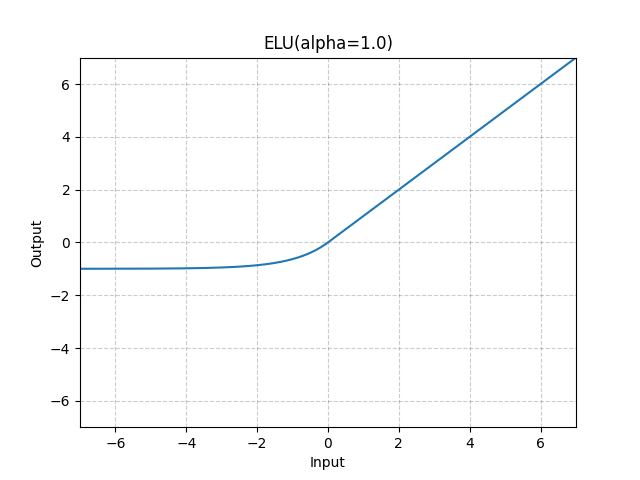

In [17]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ELU(alpha=1),
    nn.Linear(80, 10),
    nn.ELU(alpha=1),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

model = train_model(model, X_train, y_train, X_val, y_val)

# Calculate ROC curve and AUC
roc_auc = validation_auc(model, X_val, y_val)
print(f"ROC AUC: {roc_auc}")

Epoch 0, training loss 0.27036798000335693, validation loss 0.32957887649536133
Epoch 1, training loss 0.2694152593612671, validation loss 0.32846954464912415
Epoch 2, training loss 0.2680113613605499, validation loss 0.3267610967159271
Epoch 3, training loss 0.26528507471084595, validation loss 0.3235488831996918
Epoch 4, training loss 0.2583499252796173, validation loss 0.31675800681114197
Epoch 5, training loss 0.23960229754447937, validation loss 0.3008536994457245
Epoch 6, training loss 0.2597605586051941, validation loss 0.2770162522792816
Epoch 7, training loss 0.21674048900604248, validation loss 0.2619488537311554
Epoch 8, training loss 0.21962963044643402, validation loss 0.25458046793937683
Epoch 9, training loss 0.22810056805610657, validation loss 0.24918623268604279
ROC AUC: 0.8570830384918776


## 7.Softmax Function

$$
Softmax(x) = \frac{e^{x}}{\sum_{j} e^{x_{j}}}
$$

**Pros:**
- Converts raw scores into a probability distribution over multiple classes
- Useful for multi-class classification problems  

**Cons:**
- Sensitive to outliers in the input
- Outputs are not independent of each other, and the highest probability class dominates the others  

[pytorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax)

**Extra step below:**  
For softmax, we need 2 classes for our problem statment. So using one hot encoding

In [18]:
y_train_flat = y_train.view(-1)
y_train_one_hot = torch.nn.functional.one_hot(y_train_flat.to(torch.int64), num_classes=2).to(torch.float32)

y_val_flat = y_val.view(-1)
y_val_one_hot = torch.nn.functional.one_hot(y_val_flat.to(torch.int64), num_classes=2).to(torch.float32)

In [19]:
model = nn.Sequential(
    nn.Linear(200, 80),
    nn.ReLU(),
    nn.Linear(80, 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.Softmax(dim=1)
)

model = train_model(model, X_train, y_train_one_hot, X_val, y_val_one_hot)

# Calculate ROC curve and AUC
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val)

fpr, tpr, _ = roc_curve(y_val.detach().numpy(), y_val_pred[:,1].detach().numpy())
roc_auc = auc(fpr, tpr)

print(f"ROC AUC: {roc_auc}")

Epoch 0, training loss 0.2697675824165344, validation loss 0.3286378085613251
Epoch 1, training loss 0.2676389515399933, validation loss 0.3261302709579468
Epoch 2, training loss 0.26300138235092163, validation loss 0.32122117280960083
Epoch 3, training loss 0.24963216483592987, validation loss 0.3098079562187195
Epoch 4, training loss 0.23734313249588013, validation loss 0.3058421313762665
Epoch 5, training loss 0.2250947207212448, validation loss 0.2912532389163971
Epoch 6, training loss 0.21720394492149353, validation loss 0.28606346249580383
Epoch 7, training loss 0.21273113787174225, validation loss 0.2805023491382599
Epoch 8, training loss 0.206998810172081, validation loss 0.2750181555747986
Epoch 9, training loss 0.20300956070423126, validation loss 0.2704765796661377
ROC AUC: 0.8575177077721369
